# 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

## y: SPY_2011_22

In [2]:
spy = pd.read_csv("C:/Users/82105/Desktop/hello/Data/SPY/SPY_2011_22.csv")

In [3]:
# Date를 datetime 형태로 변경
spy['Date'] = pd.to_datetime(spy['Date'])

In [4]:
# Close값을 사용하여 변동성을 구하고, Fluctuation 컬럼으로 생성
spy['Fluctuation'] = spy['Close'].pct_change()

In [5]:
# 변동성 절댓값(abs()) 씌우기
spy['Fluctuation'] = (spy['Fluctuation']).abs()

In [6]:
y = spy.set_index('Date')  # 월 평균을 구하기 위해 Date를 인텍스로 설정
y = y['Fluctuation'].resample('1m').mean()  # 월 평균 변동성
y = y * 100  # 숫자가 너무 작아서 100 곱해주기

## X1: WTI유

In [7]:
oil = pd.read_csv("C:/Users/82105/Desktop/hello/Data/SPY/WTI유.csv")

In [8]:
oil = oil[['날짜', '종가']]
oil['날짜'] = pd.to_datetime(oil['날짜'])

In [9]:
oil = oil.sort_values(by='날짜', ascending=True)

In [10]:
X_oil = oil.set_index('날짜')
X_oil = X_oil['종가'].resample('1m').mean()
X_oil = X_oil.reset_index()
X_oil = X_oil.rename(columns={'날짜':'Date', '종가':'WTI유가'})

## X2: 금 선물

In [11]:
gold = pd.read_csv("C:/Users/82105/Desktop/hello/Data/금 선물.csv")

In [12]:
# 종가의 천단위를 표시하는 , 삭제
# float으로 변환 (문자형->숫자형)
gold['종가'] = gold['종가'].str.replace(',', '').astype('float')

In [13]:
gold['날짜'] = pd.to_datetime(gold['날짜'])

In [14]:
gold = gold[['날짜', '종가']]

In [15]:
gold = gold.sort_values(by = '날짜', ascending=True).reset_index(drop=True)

In [16]:
X_gold = gold.set_index('날짜')
X_gold = X_gold['종가'].resample('1m').mean()   # 월 평균 유가
X_gold = X_gold.reset_index()

In [17]:
X_gold = X_gold.rename(columns={'날짜':'Date', '종가':'금값'})

## X3: 미국 GDP

In [18]:
gdp = pd.read_csv("C:/Users/82105/Desktop/hello/Data/SPY/미국 GDP_수정.csv")

In [19]:
gdp['GDP(%)'] = gdp['GDP(%)'].str.replace('%', '').astype('float')

In [20]:
gdp['Date'] = pd.to_datetime(gdp['Date'])

In [21]:
X_gdp = gdp

## X4: 미국 생산자물가지수

In [22]:
producer = pd.read_csv("C:/Users/82105/Desktop/hello/Data/SPY/미국 생산자물가지수_수정.csv")

In [23]:
# Date를 datetime 형태로 변환
producer['Date'] = pd.to_datetime(producer['Date'])

In [24]:
# 생산자물가지수 데이터의 % 삭제
producer['생산자물가지수'] = producer['생산자물가지수'].str.replace('%', '').astype('float')

In [25]:
# 생산자물가지수(%)으로 컬럼명 변환
producer = producer.rename(columns={'생산자물가지수':'생산자물가지수(%)'})

In [26]:
X_prod = producer

## X5: 미국 소비자물가지수

In [27]:
consumer = pd.read_csv("C:/Users/82105/Desktop/hello/Data/SPY/미국 소비자물가지수_수정.csv")

In [28]:
consumer['Date'] = pd.to_datetime(consumer['Date'])

In [29]:
consumer['소비자물가지수'] = consumer['소비자물가지수'].str.replace('%', '').astype('float')

In [30]:
consumer = consumer.rename(columns={'소비자물가지수':'소비자물가지수(%)'})

In [31]:
X_consumer = consumer

## X6: 한미 시장금리

In [32]:
interest_rate = pd.read_csv("C:/Users/82105/Desktop/hello/Data/한미 시장금리.csv", encoding='cp949')

In [33]:
X_interest_rate = interest_rate
X_interest_rate['Date'] = pd.to_datetime(X_interest_rate['Date'])

## X7: 미국 평균시간당임금

In [34]:
wage = pd.read_csv("C:/Users/82105/Desktop/hello/Data/SPY/미국 평균시간당임금_수정.csv")

In [35]:
wage['Date'] = pd.to_datetime(wage['Date'])

In [36]:
wage['평균시간당임금'] = wage['평균시간당임금'].str.replace('%', '').astype('float')

In [37]:
wage = wage.rename(columns={'평균시간당임금':'평균시간당임금(%)'})

In [38]:
X_wage = wage

## X8: SPY 거래량

In [39]:
volume = pd.read_csv("C:/Users/82105/Desktop/hello/Data/SPY/SPY 거래량.csv", encoding='cp949')

In [40]:
volume['Date'] = pd.to_datetime(volume['Date'])

In [41]:
volume = volume.set_index('Date')
volume = volume['Volume'].resample('1m').mean()

In [42]:
volume = volume.reset_index()
volume = volume.rename(columns={'Volume':'거래량'})

In [43]:
X_volume = volume

# 데이터 merge

In [48]:
X = pd.merge(X_gold, X_oil, how='outer', on='Date')
X = pd.merge(X, X_gdp, how='outer', on='Date')
X = pd.merge(X, X_prod, how='outer', on='Date')
X = pd.merge(X, X_consumer, how='outer', on='Date')
X = pd.merge(X, X_interest_rate, how='outer', on='Date')
X = pd.merge(X, X_wage, how='outer', on='Date')
X = pd.merge(X, X_volume, how='outer', on='Date')

In [49]:
X

,Date,금값,WTI유가,GDP(%),생산자물가지수(%),소비자물가지수(%),한국_시장금리,미국_시장금리,평균시간당임금(%),거래량
0,2011-01-31,1362.238095,89.578500,3.2,1.1,1.5,3.09,0.1,0.1,1.430157e+08
1,2011-02-28,1375.715000,89.743158,2.8,0.8,1.6,NaN,NaN,0.4,1.484249e+08
2,2011-03-31,1422.939130,102.981304,3.1,1.6,2.1,NaN,NaN,0.0,2.081504e+08
3,2011-04-30,1482.500000,110.038500,1.8,0.7,2.7,NaN,NaN,0.0,1.406359e+08
4,2011-05-31,1512.477273,101.356667,1.8,0.8,3.2,NaN,NaN,0.1,1.589337e+08
...,...,...,...,...,...,...,...,...,...,...
139,2022-08-31,1778.647826,91.482609,-0.6,-0.5,8.5,NaN,NaN,0.5,6.275628e+07
140,2022-09-30,1692.076087,84.219565,-0.6,-0.1,8.3,NaN,NaN,0.3,9.518612e+07
141,2022-10-31,1672.738095,87.030952,2.6,0.4,8.2,NaN,NaN,0.3,9.641581e+07
142,2022-11-30,1731.109091,84.093636,2.9,0.2,7.7,NaN,NaN,0.4,8.314216e+07


# 최종 df

In [50]:
X.to_csv("C:/Users/82105/Desktop/hello/Data/SPY/SPY 다중선형회귀 df.csv", encoding='utf-8-sig')

# 다중선형회귀

In [51]:
df = pd.read_csv('C:/Users/82105/Desktop/hello/Data/SPY/SPY 다중선형회귀 df.csv')

In [52]:
# Unnamed 컬럼 삭제
df = df.iloc[:, 1:]

In [53]:
df.columns

Index(['Date', '금값', 'WTI유가', 'GDP(%)', '생산자물가지수(%)', '소비자물가지수(%)', '한국_시장금리',
       '미국_시장금리', '평균시간당임금(%)', '거래량'],
      dtype='object')

# NaN값 채우기: KNNImputer()

In [54]:
from sklearn.impute import KNNImputer

In [55]:
# Date 컬럼을 뺀 실제 X들만 가져오기
df1 = df[['금값', 'WTI유가', 'GDP(%)', '생산자물가지수(%)', '소비자물가지수(%)', '한국_시장금리',
       '미국_시장금리', '평균시간당임금(%)', '거래량']]

In [56]:
df1

,금값,WTI유가,GDP(%),생산자물가지수(%),소비자물가지수(%),한국_시장금리,미국_시장금리,평균시간당임금(%),거래량
0,1362.238095,89.578500,3.2,1.1,1.5,3.09,0.1,0.1,1.430157e+08
1,1375.715000,89.743158,2.8,0.8,1.6,NaN,NaN,0.4,1.484249e+08
2,1422.939130,102.981304,3.1,1.6,2.1,NaN,NaN,0.0,2.081504e+08
3,1482.500000,110.038500,1.8,0.7,2.7,NaN,NaN,0.0,1.406359e+08
4,1512.477273,101.356667,1.8,0.8,3.2,NaN,NaN,0.1,1.589337e+08
...,...,...,...,...,...,...,...,...,...
139,1778.647826,91.482609,-0.6,-0.5,8.5,NaN,NaN,0.5,6.275628e+07
140,1692.076087,84.219565,-0.6,-0.1,8.3,NaN,NaN,0.3,9.518612e+07
141,1672.738095,87.030952,2.6,0.4,8.2,NaN,NaN,0.3,9.641581e+07
142,1731.109091,84.093636,2.9,0.2,7.7,NaN,NaN,0.4,8.314216e+07


In [57]:
imputer = KNNImputer()
df1[['금값', 'WTI유가', 'GDP(%)', '생산자물가지수(%)', '소비자물가지수(%)', '한국_시장금리',
       '미국_시장금리', '평균시간당임금(%)', '거래량']] = imputer.fit_transform(df1[['금값', 'WTI유가', 'GDP(%)', '생산자물가지수(%)', '소비자물가지수(%)', '한국_시장금리',
       '미국_시장금리', '평균시간당임금(%)', '거래량']])

C:\Users\82105\AppData\Local\Temp\ipykernel_12068\1934945154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['금값', 'WTI유가', 'GDP(%)', '생산자물가지수(%)', '소비자물가지수(%)', '한국_시장금리',


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   금값          144 non-null    float64
 1   WTI유가       144 non-null    float64
 2   GDP(%)      144 non-null    float64
 3   생산자물가지수(%)  144 non-null    float64
 4   소비자물가지수(%)  144 non-null    float64
 5   한국_시장금리     144 non-null    float64
 6   미국_시장금리     144 non-null    float64
 7   평균시간당임금(%)  144 non-null    float64
 8   거래량         144 non-null    float64
dtypes: float64(9)
memory usage: 10.2 KB


In [59]:
df1  # NaN값 채워진 거 확인하기

,금값,WTI유가,GDP(%),생산자물가지수(%),소비자물가지수(%),한국_시장금리,미국_시장금리,평균시간당임금(%),거래량
0,1362.238095,89.578500,3.2,1.1,1.5,3.090,0.100,0.1,1.430157e+08
1,1375.715000,89.743158,2.8,0.8,1.6,2.550,0.114,0.4,1.484249e+08
2,1422.939130,102.981304,3.1,1.6,2.1,2.350,0.176,0.0,2.081504e+08
3,1482.500000,110.038500,1.8,0.7,2.7,2.550,0.114,0.0,1.406359e+08
4,1512.477273,101.356667,1.8,0.8,3.2,2.350,0.176,0.1,1.589337e+08
...,...,...,...,...,...,...,...,...,...
139,1778.647826,91.482609,-0.6,-0.5,8.5,1.136,1.090,0.5,6.275628e+07
140,1692.076087,84.219565,-0.6,-0.1,8.3,1.464,1.032,0.3,9.518612e+07
141,1672.738095,87.030952,2.6,0.4,8.2,1.464,1.032,0.3,9.641581e+07
142,1731.109091,84.093636,2.9,0.2,7.7,1.136,1.090,0.4,8.314216e+07


## train, validation 데이터 나누기

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_val, y_train, y_val = train_test_split(df1, y, random_state=42, test_size=0.2)

## Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train[['금값', 'WTI유가', 'GDP(%)', '생산자물가지수(%)', '소비자물가지수(%)', '한국_시장금리',
       '미국_시장금리', '평균시간당임금(%)', '거래량']] = scaler.transform(X_train[['금값', 'WTI유가', 'GDP(%)', '생산자물가지수(%)', '소비자물가지수(%)', '한국_시장금리',
       '미국_시장금리', '평균시간당임금(%)', '거래량']])
X_val[['금값', 'WTI유가', 'GDP(%)', '생산자물가지수(%)', '소비자물가지수(%)', '한국_시장금리',
       '미국_시장금리', '평균시간당임금(%)', '거래량']] = scaler.transform(X_val[['금값', 'WTI유가', 'GDP(%)', '생산자물가지수(%)', '소비자물가지수(%)', '한국_시장금리',
       '미국_시장금리', '평균시간당임금(%)', '거래량']])

## 다중선형회귀  
X1~X10이 y에게 영향을 끼치는 정도

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
linear = LinearRegression()

In [66]:
# 학습
linear.fit(X_train, y_train)

LinearRegression()

In [67]:
# 예측
train_pred = linear.predict(X_train)
valid_pred = linear.predict(X_val)

In [68]:
# 결정 계수
from sklearn.metrics import r2_score

In [69]:
print(r2_score(y_train, train_pred))
print(r2_score(y_val, valid_pred))

0.6974383858593105
0.4857432072091775


In [70]:
# X1~X10이 y에게 영향을 끼치는 정도
result_dic = {column:coef for column, coef in zip(df1.columns, linear.coef_)}

In [71]:
result_dic

{'금값': 0.07067199567014375,
 'WTI유가': -0.1731544167133466,
 'GDP(%)': -0.035102860282434235,
 '생산자물가지수(%)': -0.021359292384773933,
 '소비자물가지수(%)': 0.21744859954147222,
 '한국_시장금리': 0.0630927967775887,
 '미국_시장금리': 0.02535502506532671,
 '평균시간당임금(%)': 0.019356795487217394,
 '거래량': 0.24089874089716157}

# XGBoost  
모델을 예측할 때 X1~X10이 사용된 빈도/정도

In [72]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [73]:
modelXGB = XGBRegressor()

In [74]:
modelXGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [75]:
# 예측
train_pred = modelXGB.predict(X_train)
valid_pred = modelXGB.predict(X_val)

In [76]:
print(r2_score(y_train, train_pred))
print(r2_score(y_val, valid_pred))

# 과적합 ㅠ

0.999992838536593
0.2511594333999362


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

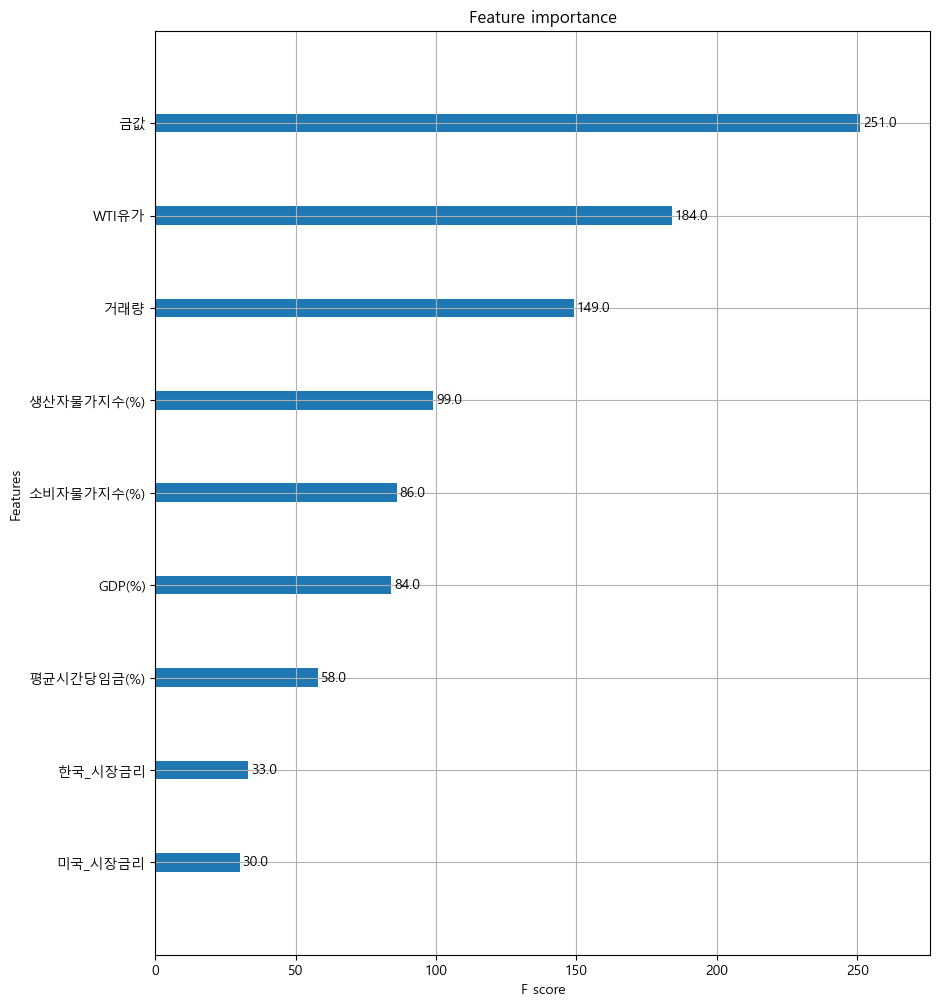

In [77]:
# 모델을 예측할 때 X1~X10이 사용된 빈도/정도
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(modelXGB, ax=ax)

# SHAP value

In [78]:
import shap
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

In [79]:
explainer1 = shap.Explainer(modelXGB, X_val)
shap_values1 = explainer1(X_val)

Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


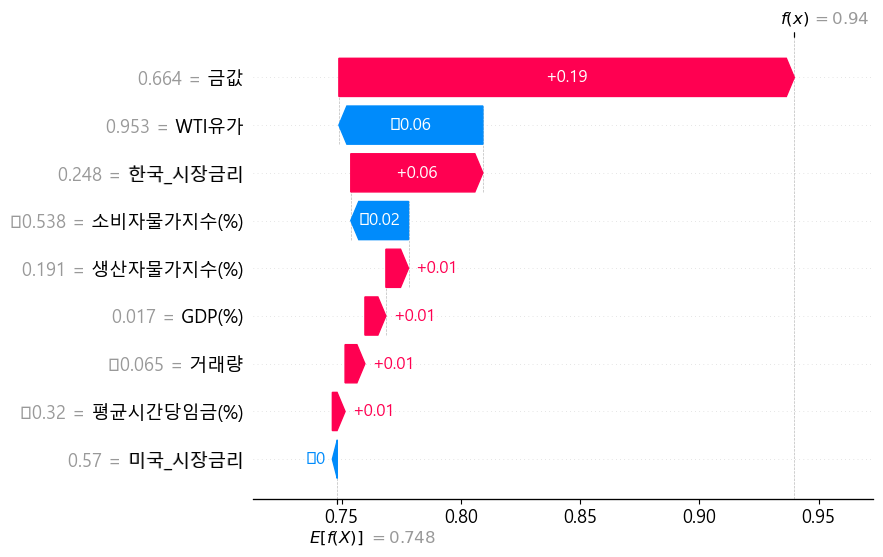

In [80]:
shap.plots.waterfall(shap_values1[1])